# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [19]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [20]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [21]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [22]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [23]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [27]:
pip install seaborn

                                              0.0/294.9 kB ? eta -:--:--
     -----                                 41.0/294.9 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

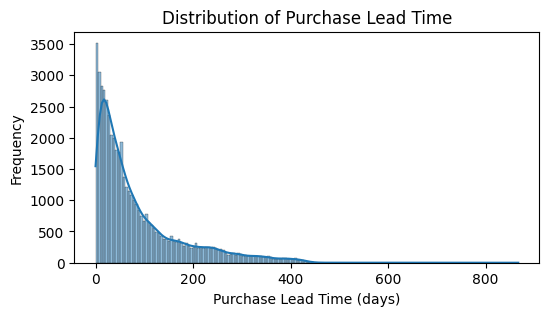

In [75]:
# Data Visualization
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x="purchase_lead",  kde=True)
plt.title("Distribution of Purchase Lead Time")
plt.xlabel("Purchase Lead Time (days)")
plt.ylabel("Frequency")
plt.show()

In [49]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,6,1,0,0,5.52,0
1,1,112,20,3,6,0,0,0,5.52,0
2,2,243,22,17,3,1,1,0,5.52,0
3,1,96,31,4,6,0,0,1,5.52,0
4,2,68,22,15,3,1,0,1,5.52,0


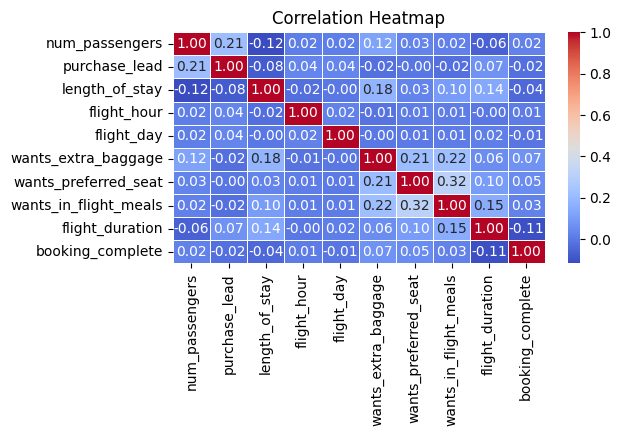

purchase_lead            1.000000
num_passengers           0.212606
flight_duration          0.067866
flight_day               0.036531
flight_hour              0.035973
wants_preferred_seat    -0.004499
booking_complete        -0.022131
wants_extra_baggage     -0.022207
wants_in_flight_meals   -0.022653
length_of_stay          -0.076560
Name: purchase_lead, dtype: float64


In [58]:
# Plot correlations between numerical variables
plt.figure(figsize=(6, 3))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
purchase_lead_corr = numeric_df.corr()["purchase_lead"].sort_values(ascending=False)
print(purchase_lead_corr)

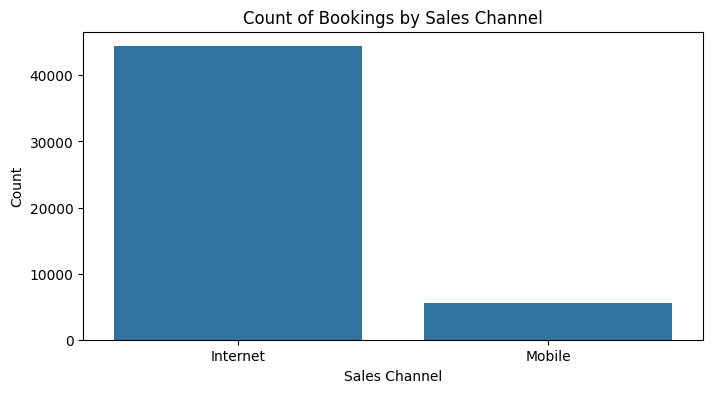

In [44]:
# Plot categorical variables
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="sales_channel")
plt.title("Count of Bookings by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Count")
plt.show()

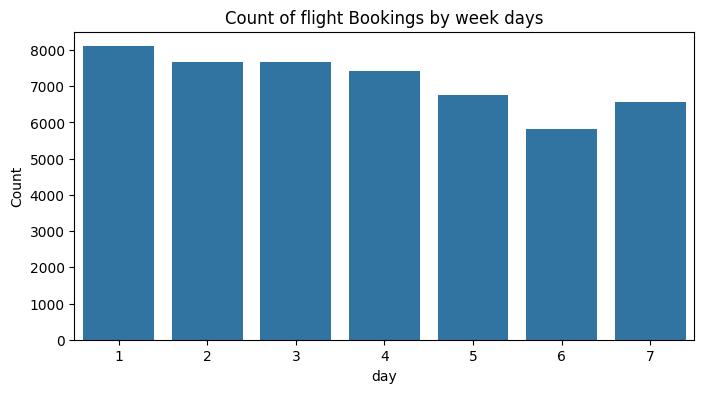

In [46]:
# Plot categorical variables
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="flight_day")
plt.title("Count of flight Bookings by week days")
plt.xlabel("day")
plt.ylabel("Count")
plt.show()

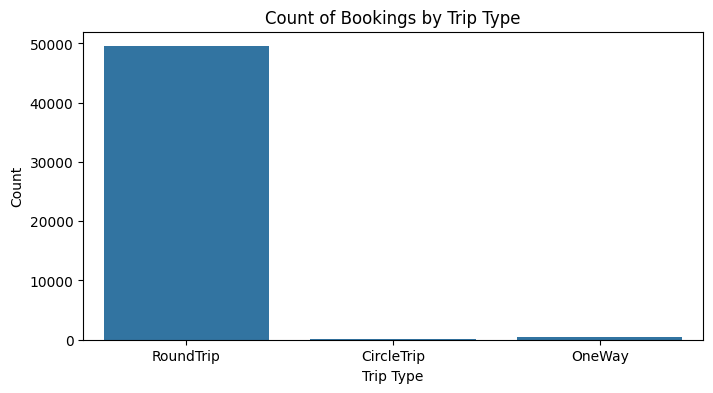

In [48]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="trip_type")
plt.title("Count of Bookings by Trip Type")
plt.xlabel("Trip Type")
plt.ylabel("Count")
plt.show()

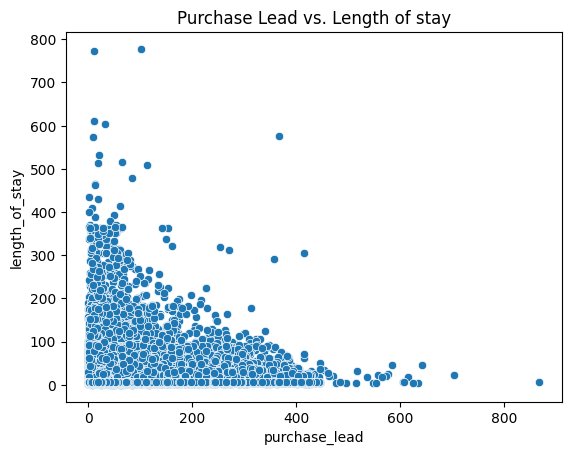

In [54]:
# Scatter plot (numerical vs. numerical)
sns.scatterplot(x='purchase_lead', y='length_of_stay', data=df)
plt.title('Purchase Lead vs. Length of stay')
plt.show()

In [56]:
# Feature Engineering
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=["sales_channel", "trip_type", "booking_origin"], drop_first=True)
df_encoded

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,AKLDEL,1,0,0,5.52,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,6,AKLDEL,0,0,0,5.52,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,17,3,AKLDEL,1,1,0,5.52,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,4,6,AKLDEL,0,0,1,5.52,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,15,3,AKLDEL,1,0,1,5.52,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,1,0,1,5.62,...,False,False,False,False,False,False,False,False,False,False
49996,1,111,6,4,7,PERPNH,0,0,0,5.62,...,False,False,False,False,False,False,False,False,False,False
49997,1,24,6,22,6,PERPNH,0,0,1,5.62,...,False,False,False,False,False,False,False,False,False,False
49998,1,15,6,11,1,PERPNH,1,0,1,5.62,...,False,False,False,False,False,False,False,False,False,False


In [62]:
pip install scikit-learn

                                              0.0/10.6 MB ? eta -:--:--
                                             0.0/10.6 MB 960.0 kB/s eta 0:00:12
     --                                       0.7/10.6 MB 8.6 MB/s eta 0:00:02
     ------                                   1.6/10.6 MB 11.6 MB/s eta 0:00:01
     ----------                               2.8/10.6 MB 16.0 MB/s eta 0:00:01
     -------------                            3.6/10.6 MB 15.5 MB/s eta 0:00:01
     -----------------                        4.8/10.6 MB 16.9 MB/s eta 0:00:01
     ---------------------                    5.7/10.6 MB 17.4 MB/s eta 0:00:01
     -------------------------                6.8/10.6 MB 18.8 MB/s eta 0:00:01
     -----------------------------            7.7/10.6 MB 19.0 MB/s eta 0:00:01
     ---------------------------------        8.8/10.6 MB 19.4 MB/s eta 0:00:01
     ------------------------------------     9.6/10.6 MB 19.8 MB/s eta 0:00:01
     --------------------------------------  10.6


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Random forest classifier Model Evaluation:
Accuracy: 0.8518
Confusion Matrix:
 [[8322  198]
 [1284  196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.50      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000



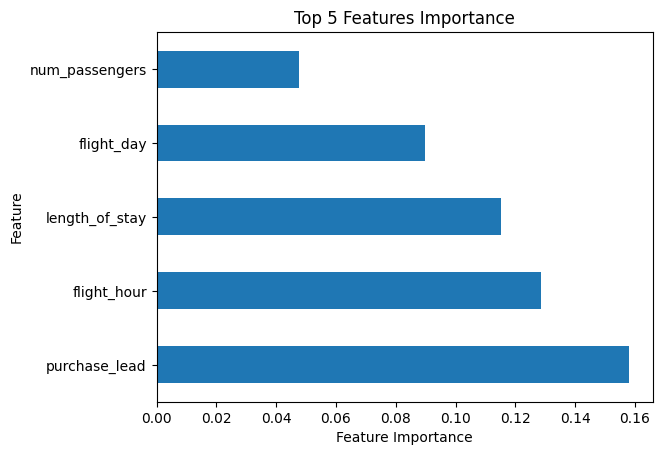

In [78]:
# the data is split into training and testing sets using a ratio of 80% training data and 20% testing data. 
# This splitting ratio is specified using the test_size parameter in the train_test_split function:
# Target Variable - booking complete or not

# Split the dataset into features (X) and the target variable (y)
X = df_encoded.drop("booking_complete", axis=1)
y = df_encoded["booking_complete"]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier model
rf_classifier = RandomForestClassifier()

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Step 4: Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict the target variable using the trained model
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
print("Random forest classifier Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Interpretation and Analysis
# Visualize feature importance
import matplotlib.pyplot as plt

feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.title("Top 5 Features Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


1. The model's accuracy is 0.8533, which means it correctly predicts whether booking is completed or not about 85.33% of the time.
2. 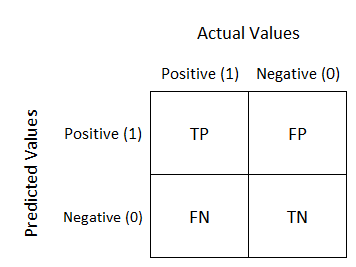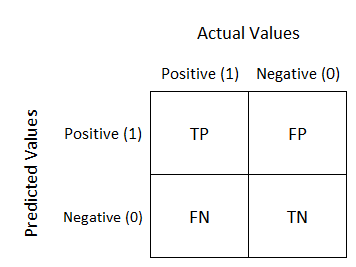

   
   Confusion Matrix:    `
True Positive (TP`): The model correctly predicts that a customer completes the booking process (booking_complete = 1). In this case, there a                              e 197 true positives   `.
True Negative (T`N): The model correctly predicts that a customer does not complete the booking process (booking_complete = 0). In this ca                                e, there are 8336 true negative   `s.
False Positive (`FP): The model incorrectly predicts that a customer completes the booking process when they do not. In this case, there ar4                              184 false positiv   `es.
False Negative `(FN): The model incorrectly predicts that a customer does not complete the booking process when they do. In this case, ther                               are 1283 false negat
4. Precision: Precision for class 0 (booking not completed) is 0.87, which means that out of all instances predicted as booking not completed, 87% are actually not completed. For class 1 (booking completed), precision is 0.52, meaning that out of all instances predicted as booking completed, only 52% are actually completed.
5. 
Recall: Recall for class 0 is 0.98, indicating that 98% of all actual booking not completed instances are correctly predicted by the model. For class 1, recall is 0.13, meaning that only 13% of all actual completed booking instances are correctly predicted by the model.6. 

F1-Score: The F1-score is the harmonic mean of precision and recall. It balances precision and recall and is a useful metric for imbalanced datasets. The weighted average F1-score for both classes is 0.1.

Support: Indicates the number of actual occurrences of each class in the dataset.

Overall, the model shows high accuracy in predicting instances of class 0 (booking not completed), but it struggles with instances of class 1 (booking completed), as indicated by the low precision, recall, and F1-score for class 1. This suggests that the model may need further refinement, especially in correctly identifying completed bookingsves. 

The provided model is not directly predicting whether customers are buying holidays. Instead, it predicts whether the booking process is completed or not based on the given features.

However, it's possible to infer whether a customer is buying holidays indirectly from the prediction of booking completion. If the model predicts that the booking process is completed, it suggests that there's a higher likelihood that the customer is indeed buying holidays. Conversely, if the model predicts that the booking process is not completed, it suggests that the customer may not be buying holidays at that moment.

To predict customers buying holidays more accurately, additional data or a different target variable that directly reflects customers' travel behavior and intentions may be necessary. This could include variables such as **actual travel dates, flight check-ins, or post-travel feedback indicating customer satisfaction**. Integrating such data could provide a more accurate basis for predicting customers' holiday purchases and travel intentions.
**Collect Relevant Data:** Gather data that directly relates to customer behavior when buying holidays. This might include **browsing history on travel websites, past holiday bookings, demographics, income levels, travel preferences**, and any other relevant information.
**
Define Target Variabl**e: Determine what exactly constitutes "buying holidays." For example, it could b**e making a booking on a travel website, purchasing flight tickets, hotel reservations, or package tour**s.